# <center>ENEM
<hr>

## <center>Inicialização
<hr>

In [1]:
from cudf import DataFrame as cudf_DataFrame

import pandas as pd

In [2]:
def calcula_missing(df: pd.DataFrame) -> pd.DataFrame:

    if type(df) == cudf_DataFrame:
        mask_nulos = (df.isnull().sum() > 0).to_pandas().values

    elif type(df) == pd.DataFrame:
        mask_nulos = (df.isnull().sum() > 0).values

    else:
        raise TypeError("O parâmetro 'df' deve ser do tipo pd.DataFrame ou cudf.DataFrame.")

    cols_missing = df.columns[mask_nulos]

    if len(cols_missing) > 0:

        cols_missing = (100 * df[cols_missing].isnull().sum() / df.shape[0])

        cols_missing = cols_missing.sort_values(ascending = False).reset_index()

        cols_missing.rename(columns = {0: '%_nulos', 'index': 'variavel'}, inplace = True)

        print("=" * 50)
        print()

        print("Percentual de valores ausentes por variável\n")

        print(cols_missing)

        print()
        print("=" * 50)

    else:
        print(f"Não há valores ausentes.")

    del mask_nulos

    return cols_missing

## <center>Importação dos Dados
<hr>

In [3]:
df_enem = pd.DataFrame()

for ano in [2020, 2021, 2022, 2023]:

    df = pd.read_csv(f'dados/MICRODADOS_ENEM_{ano}.csv', sep = ';', encoding = 'latin1')

    print(f"ENEM {ano} tem {df.shape[0] :,} linhas e {df.shape[1] :,} colunas.")

    df_enem = pd.concat([df_enem, df], ignore_index = True)

del df, ano

print()
print(f"ENEM final tem {df_enem.shape[0] :,} linhas e {df_enem.shape[1] :,} colunas.")

ENEM 2020 tem 5,783,109 linhas e 76 colunas.
ENEM 2021 tem 3,389,832 linhas e 76 colunas.
ENEM 2022 tem 3,476,105 linhas e 76 colunas.
ENEM 2023 tem 3,933,955 linhas e 76 colunas.

ENEM final tem 16,583,001 linhas e 76 colunas.


## <center>Renomeando
<hr>

In [4]:
df_enem.rename(columns = {
    'NU_INSCRICAO'              : 'num_inscricao',
    'NU_ANO'                    : 'edicao',
    'TP_FAIXA_ETARIA'           : 'fx_etaria',
    'TP_SEXO'                   : 'sexo',
    'TP_ESTADO_CIVIL'           : 'estado_civil',
    'TP_COR_RACA'               : 'cor_raca',
    'TP_NACIONALIDADE'          : 'nacionalidade',
    'TP_ST_CONCLUSAO'           : 'conclusao_ensino_medio',
    'TP_ANO_CONCLUIU'           : 'ano_conclusao_ensino_medio',
    'TP_ESCOLA'                 : 'tp_escola',
    'TP_ENSINO'                 : 'tp_ensino',
    'IN_TREINEIRO'              : 'flag_treineiro',
    'CO_MUNICIPIO_ESC'          : 'cod_municipio_escola',
    'NO_MUNICIPIO_ESC'          : 'nome_municipio_escola',
    'CO_UF_ESC'                 : 'cod_uf_escola',
    'SG_UF_ESC'                 : 'sigla_uf_escola',
    'TP_DEPENDENCIA_ADM_ESC'    : 'tp_adm_escola',
    'TP_LOCALIZACAO_ESC'        : 'tp_local_escola',
    'TP_SIT_FUNC_ESC'           : 'funcionamento_escola',
    'CO_MUNICIPIO_PROVA'        : 'cod_municipio_prova',
    'NO_MUNICIPIO_PROVA'        : 'nome_municipio_prova',
    'CO_UF_PROVA'               : 'cod_uf_prova',
    'SG_UF_PROVA'               : 'sigla_uf_prova',
    'TP_PRESENCA_CN'            : 'presenca_ciencias_natureza',
    'TP_PRESENCA_CH'            : 'presenca_ciencias_humanas',
    'TP_PRESENCA_LC'            : 'presenca_linguagem_codigos',
    'TP_PRESENCA_MT'            : 'presenca_matematica',
    'CO_PROVA_CN'               : 'cod_prova_ciencias_natureza',
    'CO_PROVA_CH'               : 'cod_prova_ciencias_humanas',
    'CO_PROVA_LC'               : 'cod_prova_linguagem_codigos',
    'CO_PROVA_MT'               : 'cod_prova_matematica',
    'NU_NOTA_CN'                : 'nota_ciencias_natureza',
    'NU_NOTA_CH'                : 'nota_ciencias_humanas',
    'NU_NOTA_LC'                : 'nota_linguagem_codigos',
    'NU_NOTA_MT'                : 'nota_matematica',
    'TX_RESPOSTAS_CN'           : 'respostas_ciencias_natureza',
    'TX_RESPOSTAS_CH'           : 'respostas_ciencias_humanas',
    'TX_RESPOSTAS_LC'           : 'respostas_linguagem_codigos',
    'TX_RESPOSTAS_MT'           : 'respostas_matematica',
    'TP_LINGUA'                 : 'lingua_estrangeira',
    'TX_GABARITO_CN'            : 'gabarito_ciencias_natureza',
    'TX_GABARITO_CH'            : 'gabarito_ciencias_humanas',
    'TX_GABARITO_LC'            : 'gabarito_linguagem_codigos',
    'TX_GABARITO_MT'            : 'gabarito_matematica',
    'TP_STATUS_REDACAO'         : 'status_redacao',
    'NU_NOTA_COMP1'             : 'nota_redacao_competencia_1',
    'NU_NOTA_COMP2'             : 'nota_redacao_competencia_2',
    'NU_NOTA_COMP3'             : 'nota_redacao_competencia_3',
    'NU_NOTA_COMP4'             : 'nota_redacao_competencia_4',
    'NU_NOTA_COMP5'             : 'nota_redacao_competencia_5',
    'NU_NOTA_REDACAO'           : 'nota_redacao',
    'Q001'                      : '01_escolaridade_pai',
    'Q002'                      : '02_escolaridade_mae',
    'Q003'                      : '03_ocupacao_pai',
    'Q004'                      : '04_ocupacao_mae',
    'Q005'                      : '05_qtde_moradores',
    'Q006'                      : '06_renda_familiar',
    'Q007'                      : '07_qtde_trabalhador_domestico',
    'Q008'                      : '08_qtde_banheiro',
    'Q009'                      : '09_qtde_quarto',
    'Q010'                      : '10_qtde_carro',
    'Q011'                      : '11_qtde_motocicleta',
    'Q012'                      : '12_qtde_geladeira',
    'Q013'                      : '13_qtde_freezer',
    'Q014'                      : '14_qtde_maq_lavar_roupa',
    'Q015'                      : '15_qtde_maq_secar_roupa',
    'Q016'                      : '16_qtde_micro_ondas',
    'Q017'                      : '17_qtde_maq_lavar_louca',
    'Q018'                      : '18_flag_aspirador_po',
    'Q019'                      : '19_qtde_tv',
    'Q020'                      : '20_flag_aparelho_dvd',
    'Q021'                      : '21_flag_tv_assinatura',
    'Q022'                      : '22_qtde_celular',
    'Q023'                      : '23_flag_telefone_fixo',
    'Q024'                      : '24_qtde_computadores',
    'Q025'                      : '25_flag_internet'
}, inplace = True)

## <center>Retirando variáveis que não vão ser usadas
<hr>

In [5]:
df_enem.drop(columns =
    [
        'num_inscricao',
        'nota_redacao_competencia_1',
        'nota_redacao_competencia_2',
        'nota_redacao_competencia_3',
        'nota_redacao_competencia_4',
        'nota_redacao_competencia_5',
        'gabarito_ciencias_natureza',
        'gabarito_ciencias_humanas',
        'gabarito_linguagem_codigos',
        'gabarito_matematica',
        'respostas_ciencias_natureza',
        'respostas_ciencias_humanas',
        'respostas_linguagem_codigos',
        'respostas_matematica',
        'cod_prova_ciencias_natureza',
        'cod_prova_ciencias_humanas',
        'cod_prova_linguagem_codigos',
        'cod_prova_matematica',
        'cod_municipio_prova',
        'nome_municipio_prova',
        'cod_uf_prova',
        'sigla_uf_prova'
    ],
    inplace = True
)

## <center>Ajuste nos valores das variáveis
<hr>

In [6]:
### Presença

dc_presenca = {
    0: 'Falta',
    1: 'Presente',
    2: 'Eliminado'
}

df_enem['presenca_ciencias_humanas'] = df_enem['presenca_ciencias_humanas'].map(dc_presenca)
df_enem['presenca_ciencias_natureza'] = df_enem['presenca_ciencias_natureza'].map(dc_presenca)
df_enem['presenca_linguagem_codigos'] = df_enem['presenca_linguagem_codigos'].map(dc_presenca)
df_enem['presenca_matematica'] = df_enem['presenca_matematica'].map(dc_presenca)

del dc_presenca

In [7]:
### Status Redação

dc_status_redacao = {
    1:	'sem_problemas',
    2:	'anulada',
    3:	'copia_texto_motivador',
    4:	'em_branco',
    6:	'fuga_ao_tema',
    7:	'nao_atendimento_ao_tipo_textual',
    8:	'texto_insuficiente',
    9:	'parte_desconectada',
    None: 'nulo'
}

df_enem['status_redacao'] = df_enem['status_redacao'].map(dc_status_redacao)

del dc_status_redacao

In [8]:
## Algumas variáveis possuem uma categoria que representa ausência de informação
## Vamos mapear essas categorias para valores nulos

In [9]:
### Estado Civil

dc_estado_civil = {
    0: None,
    1: 'solteiro',
    2: 'casado',
    3: 'separado',
    4: 'viuvo'
}

df_enem['estado_civil'] = df_enem['estado_civil'].map(dc_estado_civil)

del dc_estado_civil

In [10]:
### Cor/Raça

dc_cor_raca = {
    0: None,
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indigena',
    6: None
}

df_enem['cor_raca'] = df_enem['cor_raca'].map(dc_cor_raca)

del dc_cor_raca

In [11]:
### Nacionalidade

dc_nacionalidade = {
    0: None,
    1: 'brasileiro',
    2: 'naturalizado',
    3: 'estrangeiro',
    4: 'brasileiro_nascido_exterior'
}

df_enem['nacionalidade'] = df_enem['nacionalidade'].map(dc_nacionalidade)

del dc_nacionalidade

In [12]:
### Tipo de Escola

dc_tp_escola = {
    1: None,
    2: 'Pública',
    3: 'Privada'
}

df_enem['tp_escola'] = df_enem['tp_escola'].map(dc_tp_escola)

del dc_tp_escola

In [13]:
### Escolaridade dos Pai e da Mãe

dc_escolaridade = {
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': None
}

df_enem['01_escolaridade_pai'] = df_enem['01_escolaridade_pai'].map(dc_escolaridade)
df_enem['02_escolaridade_mae'] = df_enem['02_escolaridade_mae'].map(dc_escolaridade)

del dc_escolaridade

In [14]:
### Ocupação dos Pai e da Mãe

dc_ocupacao = {
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': None
}

df_enem['03_ocupacao_pai'] = df_enem['03_ocupacao_pai'].map(dc_ocupacao)
df_enem['04_ocupacao_mae'] = df_enem['04_ocupacao_mae'].map(dc_ocupacao)

del dc_ocupacao

In [15]:
### Língua Estrangeira

dc_lingua_estrangeira = {
    0: 'ingles',
    1: 'espanhol'
}

df_enem['lingua_estrangeira'] = df_enem['lingua_estrangeira'].map(dc_lingua_estrangeira)

del dc_lingua_estrangeira

In [16]:
### Tipo de Ensino

dc_tp_ensino = {
    1: 'regular',
    2: 'especial'
}

df_enem['tp_ensino'] = df_enem['tp_ensino'].map(dc_tp_ensino)

del dc_tp_ensino

In [17]:
### Faixa Etária

dc_fx_etaria = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T'
}

df_enem['fx_etaria'] = df_enem['fx_etaria'].map(dc_fx_etaria)

del dc_fx_etaria

## <center>Análise dos valores nulos
<hr>

In [18]:
cols_missing = calcula_missing(df_enem)


Percentual de valores ausentes por variável

                         variavel    %_nulos
0                 sigla_uf_escola  78.117200
1            cod_municipio_escola  78.117200
2                   tp_adm_escola  78.117200
3           nome_municipio_escola  78.117200
4                   cod_uf_escola  78.117200
5                 tp_local_escola  78.117200
6            funcionamento_escola  78.117200
7                       tp_ensino  69.835984
8                       tp_escola  68.248202
9          nota_ciencias_natureza  40.353944
10                nota_matematica  40.353944
11          nota_ciencias_humanas  36.992080
12                   nota_redacao  36.992080
13         nota_linguagem_codigos  36.992080
14                03_ocupacao_pai  12.518470
15            01_escolaridade_pai   9.838316
16                04_ocupacao_mae   8.991262
17                   estado_civil   4.244533
18            02_escolaridade_mae   3.516661
19                       cor_raca   1.842121
20       

In [19]:
### Irei retirar as colunas com missing maior que 50%

cols_drop = cols_missing[cols_missing['%_nulos'] > 50]['variavel'].to_list()
cols_missing = cols_missing[cols_missing['%_nulos'] <= 50]

df_enem.drop(columns = cols_drop, inplace = True)

print(f"Foram removidas {len(cols_drop)} variáveis.")
print()

print("=" * 50)
print()

print("Percentual de valores ausentes por variável\n")

print(cols_missing)

print()
print("=" * 50)

del cols_drop

Foram removidas 9 variáveis.


Percentual de valores ausentes por variável

                         variavel    %_nulos
9          nota_ciencias_natureza  40.353944
10                nota_matematica  40.353944
11          nota_ciencias_humanas  36.992080
12                   nota_redacao  36.992080
13         nota_linguagem_codigos  36.992080
14                03_ocupacao_pai  12.518470
15            01_escolaridade_pai   9.838316
16                04_ocupacao_mae   8.991262
17                   estado_civil   4.244533
18            02_escolaridade_mae   3.516661
19                       cor_raca   1.842121
20                  10_qtde_carro   0.578713
21              05_qtde_moradores   0.578713
22              06_renda_familiar   0.578713
23  07_qtde_trabalhador_domestico   0.578713
24               08_qtde_banheiro   0.578713
25                 09_qtde_quarto   0.578713
26           18_flag_aspirador_po   0.578713
27            11_qtde_motocicleta   0.578713
28              12_qtde_

In [20]:
### Irei analisar o preenchimento das notas

v_notas = \
    list(df_enem['nota_ciencias_humanas'].unique()) + \
    list(df_enem['nota_ciencias_natureza'].unique()) + \
    list(df_enem['nota_linguagem_codigos'].unique()) + \
    list(df_enem['nota_matematica'].unique()) + \
    list(df_enem['nota_redacao'].unique())

v_notas.sort()

print(f'Há zero nas notas? {0 in v_notas}')

del v_notas

Há zero nas notas? True


In [21]:
### Irei analisar a relação do missing nas notas com a presença nas provas
### No caso da redação, irei analisar o status da redação e a presença na prova de Linguagens e Códigos, que é quando a redação é aplicada

dc_analise_missing = {
    'nota_ciencias_natureza' : ['presenca_ciencias_natureza'],
    'nota_ciencias_humanas' : ['presenca_ciencias_humanas'],
    'nota_linguagem_codigos' : ['presenca_linguagem_codigos'],
    'nota_matematica' : ['presenca_matematica'],
    'nota_redacao' : ['presenca_linguagem_codigos', 'status_redacao']
}

print("=" * 50)

df_notas = pd.DataFrame()

for nota, colunas in dc_analise_missing.items():

    print(f"\nAnálise de missing para a variável {nota}\n")

    tipo_col = 'tipo_' + nota

    grp_cols = list(colunas) + [tipo_col]

    df_enem[tipo_col] = 'Com nota'

    df_enem.loc[df_enem[nota].isnull(), tipo_col] = 'Nulo'

    df_enem.loc[df_enem[nota] == 0, tipo_col] = 'Zero'

    df_temp = df_enem.groupby(grp_cols).size().reset_index(name = 'quantidade')

    df_notas = pd.concat([df_notas, df_temp], ignore_index = True)

    print(df_temp)

    print(df_temp['quantidade'].sum(), df_enem.shape[0])

    print("\n" + "=" * 50)

print()

df_enem.drop(columns = [
    'tipo_nota_ciencias_natureza',
    'tipo_nota_ciencias_humanas',
    'tipo_nota_linguagem_codigos',
    'tipo_nota_matematica',
    'tipo_nota_redacao'
], inplace = True)

del tipo_col, grp_cols, nota, colunas, df_temp, dc_analise_missing, df_notas


Análise de missing para a variável nota_ciencias_natureza

  presenca_ciencias_natureza tipo_nota_ciencias_natureza  quantidade
0                  Eliminado                        Nulo        6664
1                      Falta                        Nulo     6685231
2                   Presente                    Com nota     9872947
3                   Presente                        Zero       18159
16583001 16583001


Análise de missing para a variável nota_ciencias_humanas

  presenca_ciencias_humanas tipo_nota_ciencias_humanas  quantidade
0                 Eliminado                       Nulo       17715
1                     Falta                       Nulo     6116682
2                  Presente                   Com nota    10428820
3                  Presente                       Zero       19784
16583001 16583001


Análise de missing para a variável nota_linguagem_codigos

  presenca_linguagem_codigos tipo_nota_linguagem_codigos  quantidade
0                  Eliminado      

In [22]:
### Para as 5 notas, as notas nulas estão relacionadoas a participantes que faltaram ou foram eliminados.
### Os alunos presentes podem possuir nota zero.

### Na redação, as notas zeradas dos alunos presentes são relacionadas ao status da redação
### Porém, é possível fazer o filtro apenas com a nota zerada e a presença na prova de Linguagens e Códigos

In [23]:
cols_missing = cols_missing[~cols_missing['variavel'].isin([
    'nota_ciencias_natureza',
    'nota_ciencias_humanas',
    'nota_linguagem_codigos',
    'nota_matematica',
    'nota_redacao',
    'status_redacao'
])].reset_index(drop = True)

print(cols_missing)

                         variavel    %_nulos
0                 03_ocupacao_pai  12.518470
1             01_escolaridade_pai   9.838316
2                 04_ocupacao_mae   8.991262
3                    estado_civil   4.244533
4             02_escolaridade_mae   3.516661
5                        cor_raca   1.842121
6                   10_qtde_carro   0.578713
7               05_qtde_moradores   0.578713
8               06_renda_familiar   0.578713
9   07_qtde_trabalhador_domestico   0.578713
10               08_qtde_banheiro   0.578713
11                 09_qtde_quarto   0.578713
12           18_flag_aspirador_po   0.578713
13            11_qtde_motocicleta   0.578713
14              12_qtde_geladeira   0.578713
15                13_qtde_freezer   0.578713
16        14_qtde_maq_lavar_roupa   0.578713
17        15_qtde_maq_secar_roupa   0.578713
18            16_qtde_micro_ondas   0.578713
19        17_qtde_maq_lavar_louca   0.578713
20                22_qtde_celular   0.578713
21        

In [24]:
cols_missing = cols_missing['variavel'].to_list()

df_enem['flag_missing'] = df_enem[cols_missing].isnull().any(axis = 1).astype('bool')

print(f"{df_enem['flag_missing'].sum():,} linhas com algum valor missing.")
print(f"{df_enem['flag_missing'].sum() / df_enem.shape[0]:.2%} linhas com algum valor missing.")

4,341,559 linhas com algum valor missing.
26.18% linhas com algum valor missing.


In [25]:
### Irei retirar as linhas com algum valor missing nas colunas restantes

df_enem = df_enem[~df_enem['flag_missing']].reset_index(drop = True)
df_enem.drop(columns = ['flag_missing'], inplace = True)

In [26]:
cols_missing = calcula_missing(df_enem)

del cols_missing


Percentual de valores ausentes por variável

                 variavel    %_nulos
0  nota_ciencias_natureza  38.732300
1         nota_matematica  38.732300
2   nota_ciencias_humanas  35.505204
3  nota_linguagem_codigos  35.505204
4            nota_redacao  35.505204



In [27]:
print(f"ENEM final tem {df_enem.shape[0] :,} linhas e {df_enem.shape[1] :,} colunas.")

ENEM final tem 12,241,442 linhas e 45 colunas.


## <center>Separando os conjuntos de dados
<hr>

In [28]:
dc_dfs = {}
dc_preditoras = {}
dc_target = {}

edicoes = df_enem['edicao'].unique().tolist()

In [29]:
### Ciências Humanas

dc_dfs['Ciências Humanas'] = df_enem[
    (df_enem['presenca_ciencias_humanas'] == 'Presente')
    #   &
    # (df_enem['nota_ciencias_humanas'] != 0)
].copy()

dc_dfs['Ciências Humanas'].drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

dc_preditoras['Ciências Humanas'] = dc_dfs['Ciências Humanas'].columns.tolist()
dc_preditoras['Ciências Humanas'].remove('nota_ciencias_humanas')

dc_target['Ciências Humanas'] = 'nota_ciencias_humanas'

print(f"A base com os dados de Ciências Humanas tem {dc_dfs['Ciências Humanas'].shape[0] :,} linhas e {dc_dfs['Ciências Humanas'].shape[1] :,} colunas.")

cols_missing_humanas = calcula_missing(dc_dfs['Ciências Humanas'])

A base com os dados de Ciências Humanas tem 7,895,093 linhas e 36 colunas.
Não há valores ausentes.


In [30]:
### Ciências Natureza

dc_dfs['Ciências Natureza'] = df_enem[
    (df_enem['presenca_ciencias_natureza'] == 'Presente')
    #   &
    # (df_enem['nota_ciencias_natureza'] != 0)
].copy()

dc_dfs['Ciências Natureza'].drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_linguagem_codigos',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

dc_preditoras['Ciências Natureza'] = dc_dfs['Ciências Natureza'].columns.tolist()
dc_preditoras['Ciências Natureza'].remove('nota_ciencias_natureza')

dc_target['Ciências Natureza'] = 'nota_ciencias_natureza'

print(f"A base com os dados de Ciências Natureza tem {dc_dfs['Ciências Natureza'].shape[0] :,} linhas e {dc_dfs['Ciências Natureza'].shape[1] :,} colunas.")

cols_missing_natureza = calcula_missing(dc_dfs['Ciências Natureza'])

A base com os dados de Ciências Natureza tem 7,500,050 linhas e 36 colunas.
Não há valores ausentes.


In [31]:
### Linguagem e Código

dc_dfs['Linguagem e Código'] = df_enem[
    (df_enem['presenca_linguagem_codigos'] == 'Presente')
    #   &
    # (df_enem['nota_linguagem_codigos'] != 0)
].copy()

dc_dfs['Linguagem e Código'].drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

dc_preditoras['Linguagem e Código'] = dc_dfs['Linguagem e Código'].columns.tolist()
dc_preditoras['Linguagem e Código'].remove('nota_linguagem_codigos')

dc_target['Linguagem e Código'] = 'nota_linguagem_codigos'

print(f"A base com os dados de Linguagem e Código tem {dc_dfs['Linguagem e Código'].shape[0] :,} linhas e {dc_dfs['Linguagem e Código'].shape[1] :,} colunas.")

cols_missing_linguagem = calcula_missing(dc_dfs['Linguagem e Código'])

A base com os dados de Linguagem e Código tem 7,895,093 linhas e 36 colunas.
Não há valores ausentes.


In [32]:
### Matemática

dc_dfs['Matemática'] = df_enem[
    (df_enem['presenca_matematica'] == 'Presente')
    #   &
    # (df_enem['nota_matematica'] != 0)
].copy()

dc_dfs['Matemática'].drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_redacao'
    ],
    inplace = True
)

dc_preditoras['Matemática'] = dc_dfs['Matemática'].columns.tolist()
dc_preditoras['Matemática'].remove('nota_matematica')

dc_target['Matemática'] = 'nota_matematica'

print(f"A base com os dados de Matemática tem {dc_dfs['Matemática'].shape[0] :,} linhas e {dc_dfs['Matemática'].shape[1] :,} colunas.")

cols_missing_matematica = calcula_missing(dc_dfs['Matemática'])

A base com os dados de Matemática tem 7,500,050 linhas e 36 colunas.
Não há valores ausentes.


In [33]:
### Redação

dc_dfs['Redação'] = df_enem[
    (df_enem['presenca_linguagem_codigos'] == 'Presente')
    #   &
    # (df_enem['nota_redacao'] != 0)
].copy()

dc_dfs['Redação'].drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_matematica'
    ],
    inplace = True
)

dc_preditoras['Redação'] = dc_dfs['Redação'].columns.tolist()
dc_preditoras['Redação'].remove('nota_redacao')

dc_target['Redação'] = 'nota_redacao'

print(f"A base com os dados de Redação tem {dc_dfs['Redação'].shape[0] :,} linhas e {dc_dfs['Redação'].shape[1] :,} colunas.")

cols_missing_redacao = calcula_missing(dc_dfs['Redação'])

A base com os dados de Redação tem 7,895,093 linhas e 36 colunas.
Não há valores ausentes.


In [34]:
if \
    len(cols_missing_humanas) + \
    len(cols_missing_natureza) + \
    len(cols_missing_linguagem) + \
    len(cols_missing_matematica) + \
    len(cols_missing_redacao) == 0:

        print("Todas as bases estão sem valores missing.")

        del cols_missing_humanas, cols_missing_natureza, cols_missing_linguagem, cols_missing_matematica, cols_missing_redacao, df_enem

Todas as bases estão sem valores missing.


In [35]:
print(f"Ciências Humanas tem {dc_dfs['Ciências Humanas'].shape[0] :,} linhas e {dc_dfs['Ciências Humanas'].shape[1] :,} colunas.")
print(f"Ciências Natureza tem {dc_dfs['Ciências Natureza'].shape[0] :,} linhas e {dc_dfs['Ciências Natureza'].shape[1] :,} colunas.")
print(f"Linguagem e Código tem {dc_dfs['Linguagem e Código'].shape[0] :,} linhas e {dc_dfs['Linguagem e Código'].shape[1] :,} colunas.")
print(f"Matemática tem {dc_dfs['Matemática'].shape[0] :,} linhas e {dc_dfs['Matemática'].shape[1] :,} colunas.")
print(f"Redação tem {dc_dfs['Redação'].shape[0] :,} linhas e {dc_dfs['Redação'].shape[1] :,} colunas.")

Ciências Humanas tem 7,895,093 linhas e 36 colunas.
Ciências Natureza tem 7,500,050 linhas e 36 colunas.
Linguagem e Código tem 7,895,093 linhas e 36 colunas.
Matemática tem 7,500,050 linhas e 36 colunas.
Redação tem 7,895,093 linhas e 36 colunas.


## <center>Análise Exploratória
<hr>

In [36]:
import matplotlib.pyplot as plt

### <center>Notas
<hr>

In [37]:
### Notas distintas, delta entre notas e estatísticas descritivas

for k, v in dc_dfs.items():

    v_notas = list(v[dc_target[k]].unique())
    v_notas.sort()

    v_delta_notas = []

    for nota in range(len(v_notas) - 1):
        v_delta_notas.append(v_notas[nota + 1] - v_notas[nota])

    print("=" * 50)
    print()

    print(f"Notas distintas em {k}:")
    print()

    print(v_notas)
    print(len(v_notas))
    print()

    print(v_delta_notas)
    print()

    print(v[dc_target[k]].describe())
    print()

del k, v, v_notas, v_delta_notas, nota


Notas distintas em Ciências Humanas:

[np.float64(0.0), np.float64(289.9), np.float64(293.2), np.float64(293.5), np.float64(293.6), np.float64(293.7), np.float64(293.8), np.float64(293.9), np.float64(294.0), np.float64(294.1), np.float64(294.2), np.float64(294.3), np.float64(294.4), np.float64(294.5), np.float64(294.6), np.float64(294.7), np.float64(294.8), np.float64(294.9), np.float64(295.0), np.float64(295.1), np.float64(295.2), np.float64(295.3), np.float64(295.4), np.float64(295.5), np.float64(295.6), np.float64(295.7), np.float64(295.8), np.float64(295.9), np.float64(296.0), np.float64(296.1), np.float64(296.2), np.float64(296.3), np.float64(296.4), np.float64(296.5), np.float64(296.6), np.float64(296.7), np.float64(296.8), np.float64(296.9), np.float64(297.0), np.float64(297.1), np.float64(297.2), np.float64(297.3), np.float64(297.4), np.float64(297.5), np.float64(297.6), np.float64(297.7), np.float64(297.8), np.float64(297.9), np.float64(298.0), np.float64(298.1), np.float64(2

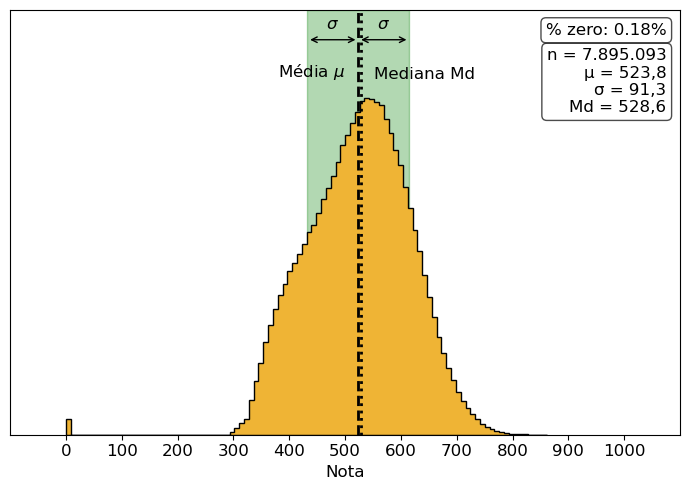

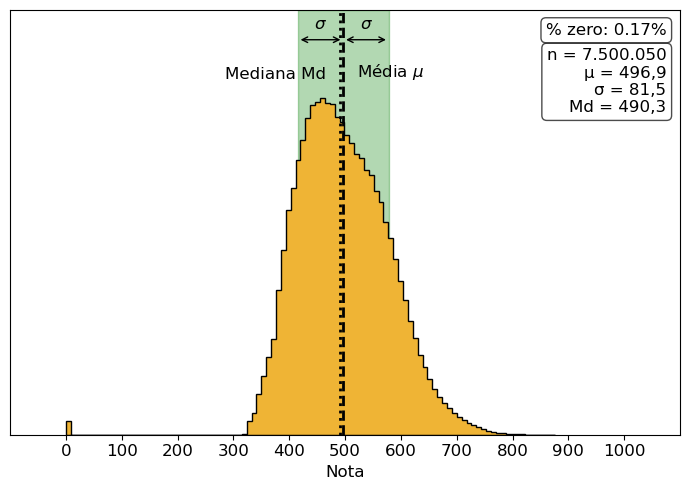

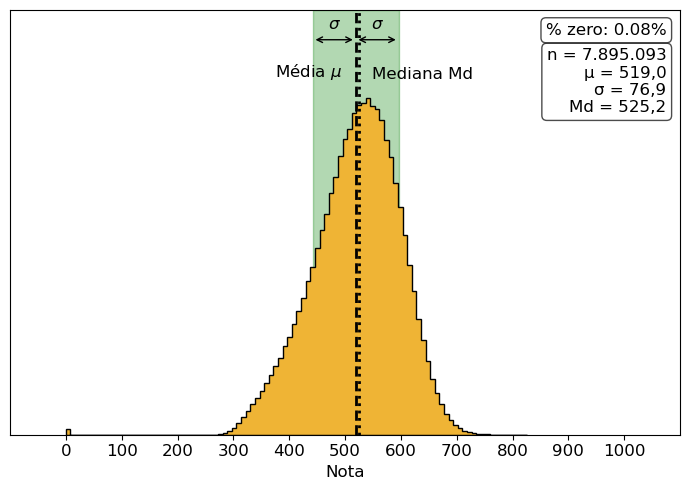

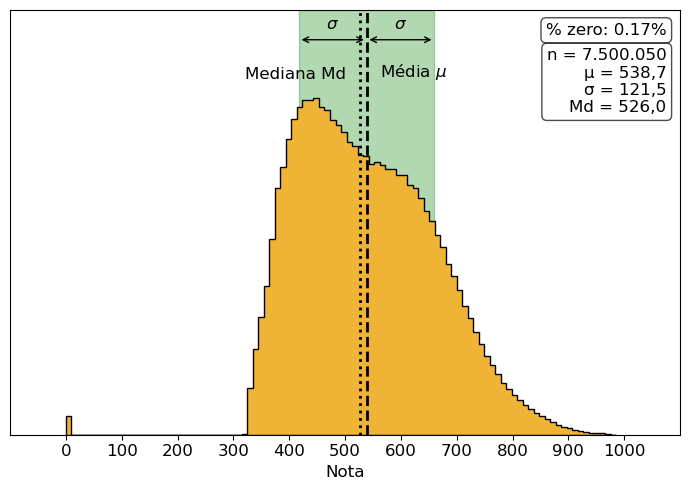

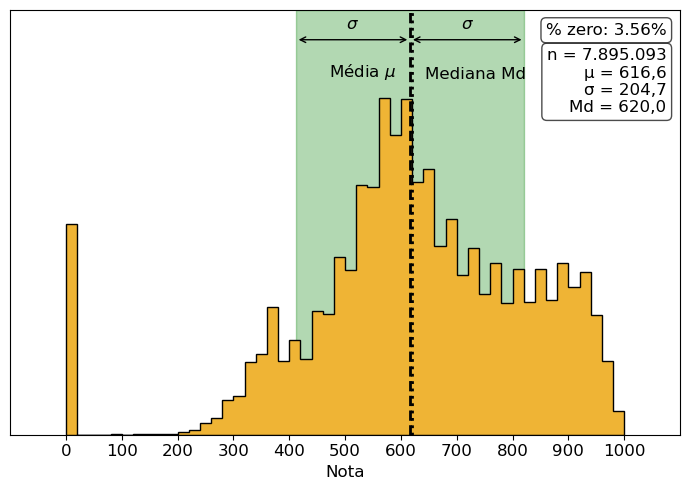

In [38]:
### Distribuição das notas

dc_nome_salvar = {
    'Ciências Humanas' : 'humanas',
    'Ciências Natureza' : 'natureza',
    'Linguagem e Código' : 'linguagem_codigo',
    'Matemática' : 'matematica',
    'Redação' : 'redacao'
}

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    if nome == 'Redação':
        bins = 50
    else:
        bins = 100

    data = df[target]

    media = data.mean()
    mediana = data.median()
    desv_pad = data.std()
    
    n_str = f"{len(data):,}".replace(",", ".")
    mean_str = f"{media:.1f}".replace(".", ",")
    std_str = f"{desv_pad:.1f}".replace(".", ",")
    med_str = f"{mediana:.1f}".replace(".", ",")

    plt.figure(figsize = (7, 5))

    # plt.title(f"Histograma das notas - {nome}", fontsize = 16)

    plt.xlabel("Nota", fontsize = 12)
    plt.ylabel("")

    plt.xticks(range(0, 1001, 100), fontsize = 12)
    plt.yticks([])

    # área verde do desvio padrão
    plt.axvspan(
        media - desv_pad,
        media + desv_pad,
        color = 'green',
        alpha = 0.3
    )

    # histograma
    plt.hist(
        data,
        bins = bins,
        color = 'xkcd:macaroni and cheese',
        alpha = 1,
        edgecolor = 'black',
        histtype = 'stepfilled'
    )

    # linha da média
    plt.axvline(
        x = media,
        color = 'black',
        linestyle = 'dashed',
        linewidth = 2,
        label = f"Média: {media:.2f}"
    )

    # linha da mediana
    plt.axvline(
        x = mediana,
        color = 'black',
        linestyle = 'dotted',
        linewidth = 2,
        label = f"Mediana: {mediana:.2f}"
    )

    plt.xlim(-100, 1100)
    plt.ylim(0, max(plt.gca().get_ylim()) * 1.2)

    # legenda feita de forma manual
    plt.text(
        0.98, 0.91,
        f"n = {n_str}\nμ = {mean_str}\nσ = {std_str}\nMd = {med_str}",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    # seta direita do desvio padrão
    y_seta = plt.gca().get_ylim()[1] * 0.93

    plt.annotate(
        "",
        xy = (media + desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media + desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # seta esquerda do desvio padrão
    plt.annotate(
        "",
        xy = (media - desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media - desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # Anotações relativas à posição da média e mediana
    x_span = plt.gca().get_xlim()[1] - plt.gca().get_xlim()[0]
    offset = x_span * 0.02

    y_pos = plt.gca().get_ylim()[1] * 0.83

    if mediana > media:
        # mediana à direita, média à esquerda
        plt.gca().text(mediana + offset, y_pos, "Mediana Md", ha='left', va='bottom', fontsize=12, color='black')
        plt.gca().text(media - offset, y_pos, r"Média $\mu$", ha='right', va='bottom', fontsize=12, color='black')
    elif media > mediana:
        # mediana à esquerda, média à direita
        plt.gca().text(mediana - offset, y_pos, "Mediana Md", ha='right', va='bottom', fontsize=12, color='black')
        plt.gca().text(media + offset, y_pos, r"Média $\mu$", ha='left', va='bottom', fontsize=12, color='black')

    # anotação do percentual de zeros

    perc_zeros = (data == 0).sum() / len(data) * 100

    plt.text(
        0.98, 0.97,
        f"% zero: {perc_zeros:.2f}%",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    plt.tight_layout()
    plt.savefig(f"../texto/imagens/histograma_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')
    plt.show()

del nome, df, bins, target, media, mediana, desv_pad
del y_seta, x_span, offset, y_pos, data, mean_str
del std_str, med_str, n_str, perc_zeros

In [ ]:
# # Subplots 2x2 com histogramas das notas de Humanas, Natureza, Linguagem e Matemática

# subjects = [
#     'Ciências Humanas',
#     'Ciências Natureza',
#     'Linguagem e Código',
#     'Matemática'
# ]

# fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# fig.suptitle("Histograma das Notas", fontsize=16)

# axes = axes.flatten()

# for ax, name in zip(axes, subjects):

#     df = dc_dfs.get(name)
#     target = dc_target.get(name)

#     data = df[target]

#     bins = 100

#     mean = data.mean()
#     med = data.median()
#     std = data.std()

#     n_str = f"{len(data):,}".replace(",", ".")
#     mean_str = f"{mean:.1f}".replace(".", ",")
#     std_str = f"{std:.1f}".replace(".", ",")
#     med_str = f"{med:.1f}".replace(".", ",")

#     # área verde do desvio padrão
#     ax.axvspan(
#         mean - std,
#         mean + std,
#         color='green',
#         alpha=0.25
#     )

#     # histograma
#     ax.hist(
#         data,
#         bins=bins,
#         color='xkcd:macaroni and cheese',
#         edgecolor='black',
#         alpha=1,
#         histtype='stepfilled'
#     )

#     # linhas da média e mediana
#     ax.axvline(mean, color='black', linestyle='dashed', linewidth=1.5, label=rf"$\mu$: {mean:.1f}")
#     ax.axvline(med, color='black', linestyle='dotted', linewidth=1.5, label=f"Md: {med:.1f}")

#     # Anotações relativas à posição da média e mediana
#     x_span = ax.get_xlim()[1] - ax.get_xlim()[0]
#     offset = x_span * 0.02  # deslocamento relativo (2% do span)

#     y_pos = ax.get_ylim()[1] * 0.97

#     if med > mean:
#         # mediana à direita, média à esquerda
#         ax.text(med + offset, y_pos, "Mediana Md", ha='left', va='bottom', fontsize=9, color='black')
#         ax.text(mean - offset, y_pos, r"Média $\mu$", ha='right', va='bottom', fontsize=9, color='black')
#     elif mean > med:
#         # mediana à esquerda, média à direita
#         ax.text(med - offset, y_pos, "Mediana Md", ha='right', va='bottom', fontsize=9, color='black')
#         ax.text(mean + offset, y_pos, r"Média $\mu$", ha='left', va='bottom', fontsize=9, color='black')

#     ax.set_title(f"{name}", fontsize=12)

#     ax.set_xlabel("Nota")

#     ax.set_xlim(-100, 1100)
#     ax.set_ylim(0, max(ax.get_ylim()) * 1.2)

#     ax.set_xticks(range(0, 1101, 100))
#     ax.set_yticks([])

#     # ax.legend(fontsize=9)

#     ax.text(
#         0.98, 0.97,
#         f"n = {n_str}\nμ = {mean_str}\nσ = {std_str}\nMd = {med_str}",
#         transform=ax.transAxes,
#         ha='right', va='top',
#         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
#         fontsize=9
#     )

#     # seta direita do desvio padrão
#     y_arrow = ax.get_ylim()[1] * 0.90

#     ax.annotate(
#         "",
#         xy = (mean + std, y_arrow),
#         xytext = (mean, y_arrow),
#         arrowprops = dict(arrowstyle="<->", color="black", linewidth=1.5)
#     )

#     ax.text(
#         mean + std / 2,
#         y_arrow * 1.02,
#         r"$\sigma$",
#         ha="center",
#         va="bottom",
#         fontsize=9,
#         color="black"
#     )

#     # seta esquerda do desvio padrão
#     ax.annotate(
#         "",
#         xy = (mean - std, y_arrow),
#         xytext = (mean, y_arrow),
#         arrowprops = dict(arrowstyle="<->", color="black", linewidth=1.5)
#     )

#     ax.text(
#         mean - std / 2,
#         y_arrow * 1.02,
#         r"$\sigma$",
#         ha="center",
#         va="bottom",
#         fontsize=9,
#         color="black"
#     )

# plt.tight_layout()
# plt.show()

# fig.savefig("../texto/imagens/histograma_notas.png", dpi=300, bbox_inches='tight')

In [ ]:
### Boxplot

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    plt.figure(figsize = (10, 6))

    # agrupar por edição e criar boxplot por edição
    data = [df.loc[df['edicao'] == e, target].values for e in edicoes]

    plt.boxplot(
        data,
        vert = True,
        patch_artist = True,
        tick_labels = edicoes,
        boxprops = dict(facecolor = 'xkcd:macaroni and cheese', color = 'black'),
        medianprops = dict(color = 'black'),
        whiskerprops = dict(color = 'black'),
        capprops = dict(color = 'black'),
        flierprops = dict(markerfacecolor = 'red', markeredgecolor = 'red', markersize = 5, marker = 'o')
    )

    plt.xlabel("Edição")
    plt.ylabel("Nota")
    plt.title(f"Boxplot das notas - {nome} por edição")

    plt.show()